# PROJECT 1

# Build Decision Tree(DV-"Survived",IDV-"Age","Gender",and"Fare") and Prediction

**IMPORT THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

**LOAD THE DATASET**

In [2]:
titanic_train=pd.read_csv("train.csv")
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.shape

(889, 12)

In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,32.699854,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.346821,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,45.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**CHECK FOR NULL VALUES**

In [5]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
label_encoder=preprocessing.LabelEncoder()

In [7]:
encoded_sex=label_encoder.fit_transform(titanic_train["Sex"])

In [8]:
tree_model=tree.DecisionTreeClassifier()

In [9]:
predictors=pd.DataFrame([encoded_sex,titanic_train["Age"],titanic_train["Fare"]]).T

In [10]:
tree_model.fit(X=predictors,y=titanic_train["Survived"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
with open("Dtree1.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=["Sex","Age","Fare"],out_file=f);

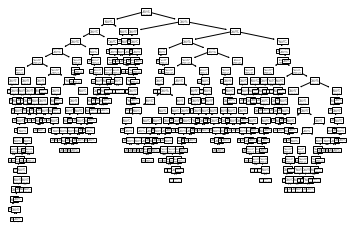

In [12]:
tree.plot_tree(tree_model);

In [13]:
tree_model.score(X=predictors,y=titanic_train["Survived"])

0.9763779527559056

MODEL ACCURACY IS 97%

# TESTING THE DATASET

In [14]:
titanic_test=pd.read_csv("test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
412,1305,3,"Spector, Mr. Woolf",male,45.0,0,0,A.5. 3236,8.0500,S
413,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
414,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
415,1308,3,"Ware, Mr. Frederick",male,45.0,0,0,359309,8.0500,S


In [15]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
encoded_sex_test=label_encoder.fit_transform(titanic_test["Sex"])

In [17]:
test_features=pd.DataFrame([encoded_sex_test,titanic_test["Age"],titanic_test["Fare"]]).T

In [18]:
test_preds=tree_model.predict(X=test_features)

In [19]:
predicted_output=pd.DataFrame({"PassengerId":titanic_test["PassengerId"],"Survived":test_preds})

In [21]:
predicted_output.to_csv("output.csv",index=False);